In [21]:
import matplotlib.pyplot as plt
import networkx as nx

In [54]:
#Belief Network with each node linked to all of its parents

feat_graph = {'age': [], 'sex': [], 'cp': [], 'trestbps': ['age', 'sex', 'chol', 'fbs'], 'chol': ['age', 'sex', 'fbs'], 'fbs': ['age', 'sex', 'chol'], 'restecg': ['age', 'sex', 'chol', 'fbs'], 'thalach': ['age', 'sex'], 
#               'exang': [], 
              'oldpeak': ['thalach'], 'ca': ['age', 'sex'], 'thal': [], 'target': ['age', 'sex', 'ca', 'thal', 'chol', 'trestbps', 'fbs', 'restecg', 'cp', 'thalach', 'oldpeak']}

In [55]:
feat_graph

{'age': [],
 'sex': [],
 'cp': [],
 'trestbps': ['age', 'sex', 'chol', 'fbs'],
 'chol': ['age', 'sex', 'fbs'],
 'fbs': ['age', 'sex', 'chol'],
 'restecg': ['age', 'sex', 'chol', 'fbs'],
 'thalach': ['age', 'sex'],
 'oldpeak': ['thalach'],
 'ca': ['age', 'sex'],
 'thal': [],
 'target': ['age',
  'sex',
  'ca',
  'thal',
  'chol',
  'trestbps',
  'fbs',
  'restecg',
  'cp',
  'thalach',
  'oldpeak']}

In [56]:
g = nx.DiGraph()
g.add_nodes_from(feat_graph.keys())

for k, v in feat_graph.items():
    g.add_edges_from(([(t, k) for t in v]))

In [57]:
g.edges()

OutEdgeView([('age', 'trestbps'), ('age', 'chol'), ('age', 'fbs'), ('age', 'restecg'), ('age', 'thalach'), ('age', 'ca'), ('age', 'target'), ('sex', 'trestbps'), ('sex', 'chol'), ('sex', 'fbs'), ('sex', 'restecg'), ('sex', 'thalach'), ('sex', 'ca'), ('sex', 'target'), ('cp', 'target'), ('trestbps', 'target'), ('chol', 'trestbps'), ('chol', 'fbs'), ('chol', 'restecg'), ('chol', 'target'), ('fbs', 'trestbps'), ('fbs', 'chol'), ('fbs', 'restecg'), ('fbs', 'target'), ('restecg', 'target'), ('thalach', 'oldpeak'), ('thalach', 'target'), ('oldpeak', 'target'), ('ca', 'target'), ('thal', 'target')])

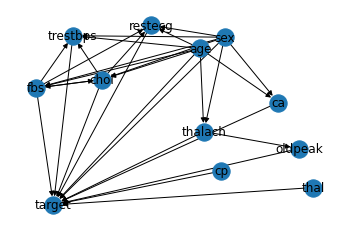

In [58]:
plt.plot()
nx.draw(g, with_labels=True)

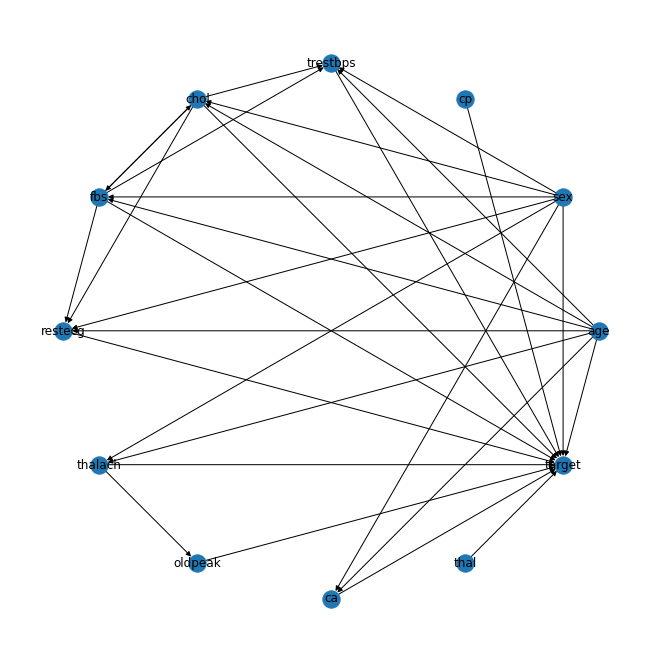

In [64]:
pos = nx.circular_layout(g)
# default
# plt.figure(1)
# nx.draw(g,pos)
# # smaller nodes and fonts
# plt.figure(2)
# nx.draw(g,pos,node_size=60,font_size=8) 
# larger figure size
plt.figure(3,figsize=(9,9)) 
nx.draw(g,pos, with_labels=True)
plt.show()